# Problem Statement
predicting weather the coustumer will accept the coupen or not can be a complex problem, and we can not offer this coupen to everyone because of the cost concerned. to overcome this probelm, we will predict weather the customers will accept the coupen or not based on the coustemer's profile or history. frequently offering a bad coupens to coustumers might drag them away from your bussiness.

- Data Contains customers History
- given data is Labled (Supervised Machine Learning problem)

## Data Information:
- Samples:                12684 
- Features:               26  
- Categorical features:   18
- Numeric Features:       8 



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data
path = r"E:/Data Science/GIT/AWS Project Deployement/12. Coupen Recommendation system"
df = pd.read_csv(f'{path}/in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

### Data Exploration (EDA)
Let's take a peek into the data and explore the data and its variables. The dataset is a supervised learning dataset with over 12000 instances and 26 attributes; this mean there is an input variable X and an out variable y.

In [ ]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#let's look at the data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

it seems that the data has some few numberical datatypes and the rest are string objects, however all the data can be categorized as being categorical datatypes with a mix of binary and ordinal datatypes.

In [ ]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

## Data Cleaning

In [ ]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

There are some missing values in several columns, and the 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [ ]:
df["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [ ]:
df.drop('car', inplace=True, axis=1)

Empty values in categorical data can be removed or replaced with the most frequent value in each column.

Lets iterate through the pandas table and get all the columns with empty or NaN values, and then for each column the code is going to find the largest variable count and fill the empty values with the corresponding variable with maximum count.

In [ ]:
# 1. handdling missing values by mode
df["RestaurantLessThan20"].fillna(df["RestaurantLessThan20"].mode()[0], inplace=True)
df["Bar"].fillna(df["Bar"].mode()[0], inplace=True)
df["CarryAway"].fillna(df["CarryAway"].mode()[0], inplace=True)
df["CoffeeHouse"].fillna(df["CoffeeHouse"].mode()[0], inplace=True)
df["Restaurant20To50"].fillna(df["Restaurant20To50"].mode()[0], inplace=True)

In [ ]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [ ]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column.

## No Multicolinearity

                   has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
has_children           1.000000               NaN           0.078211   
toCoupon_GEQ5min            NaN               NaN                NaN   
toCoupon_GEQ15min      0.078211               NaN           1.000000   
toCoupon_GEQ25min     -0.013722               NaN           0.324984   
direction_same        -0.031620               NaN          -0.303533   
direction_opp          0.031620               NaN           0.303533   
Y                     -0.045557               NaN          -0.081602   

                   toCoupon_GEQ25min  direction_same  direction_opp         Y  
has_children               -0.013722       -0.031620       0.031620 -0.045557  
toCoupon_GEQ5min                 NaN             NaN            NaN       NaN  
toCoupon_GEQ15min           0.324984       -0.303533       0.303533 -0.081602  
toCoupon_GEQ25min           1.000000       -0.192319       0.192319 -0.103633  
direction_same         

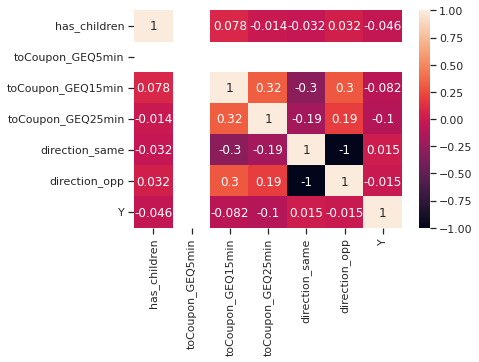

In [ ]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

- toCoupon_GEQ5min has only one unique values therefore correlation showing nan, 
- direction_same and direction_opp both are correlated so it need to dropd

In [ ]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)


In [ ]:
df.drop(columns=['direction_opp'], inplace=True)

Let's plot the distribution charts of all the categorical datatypes.

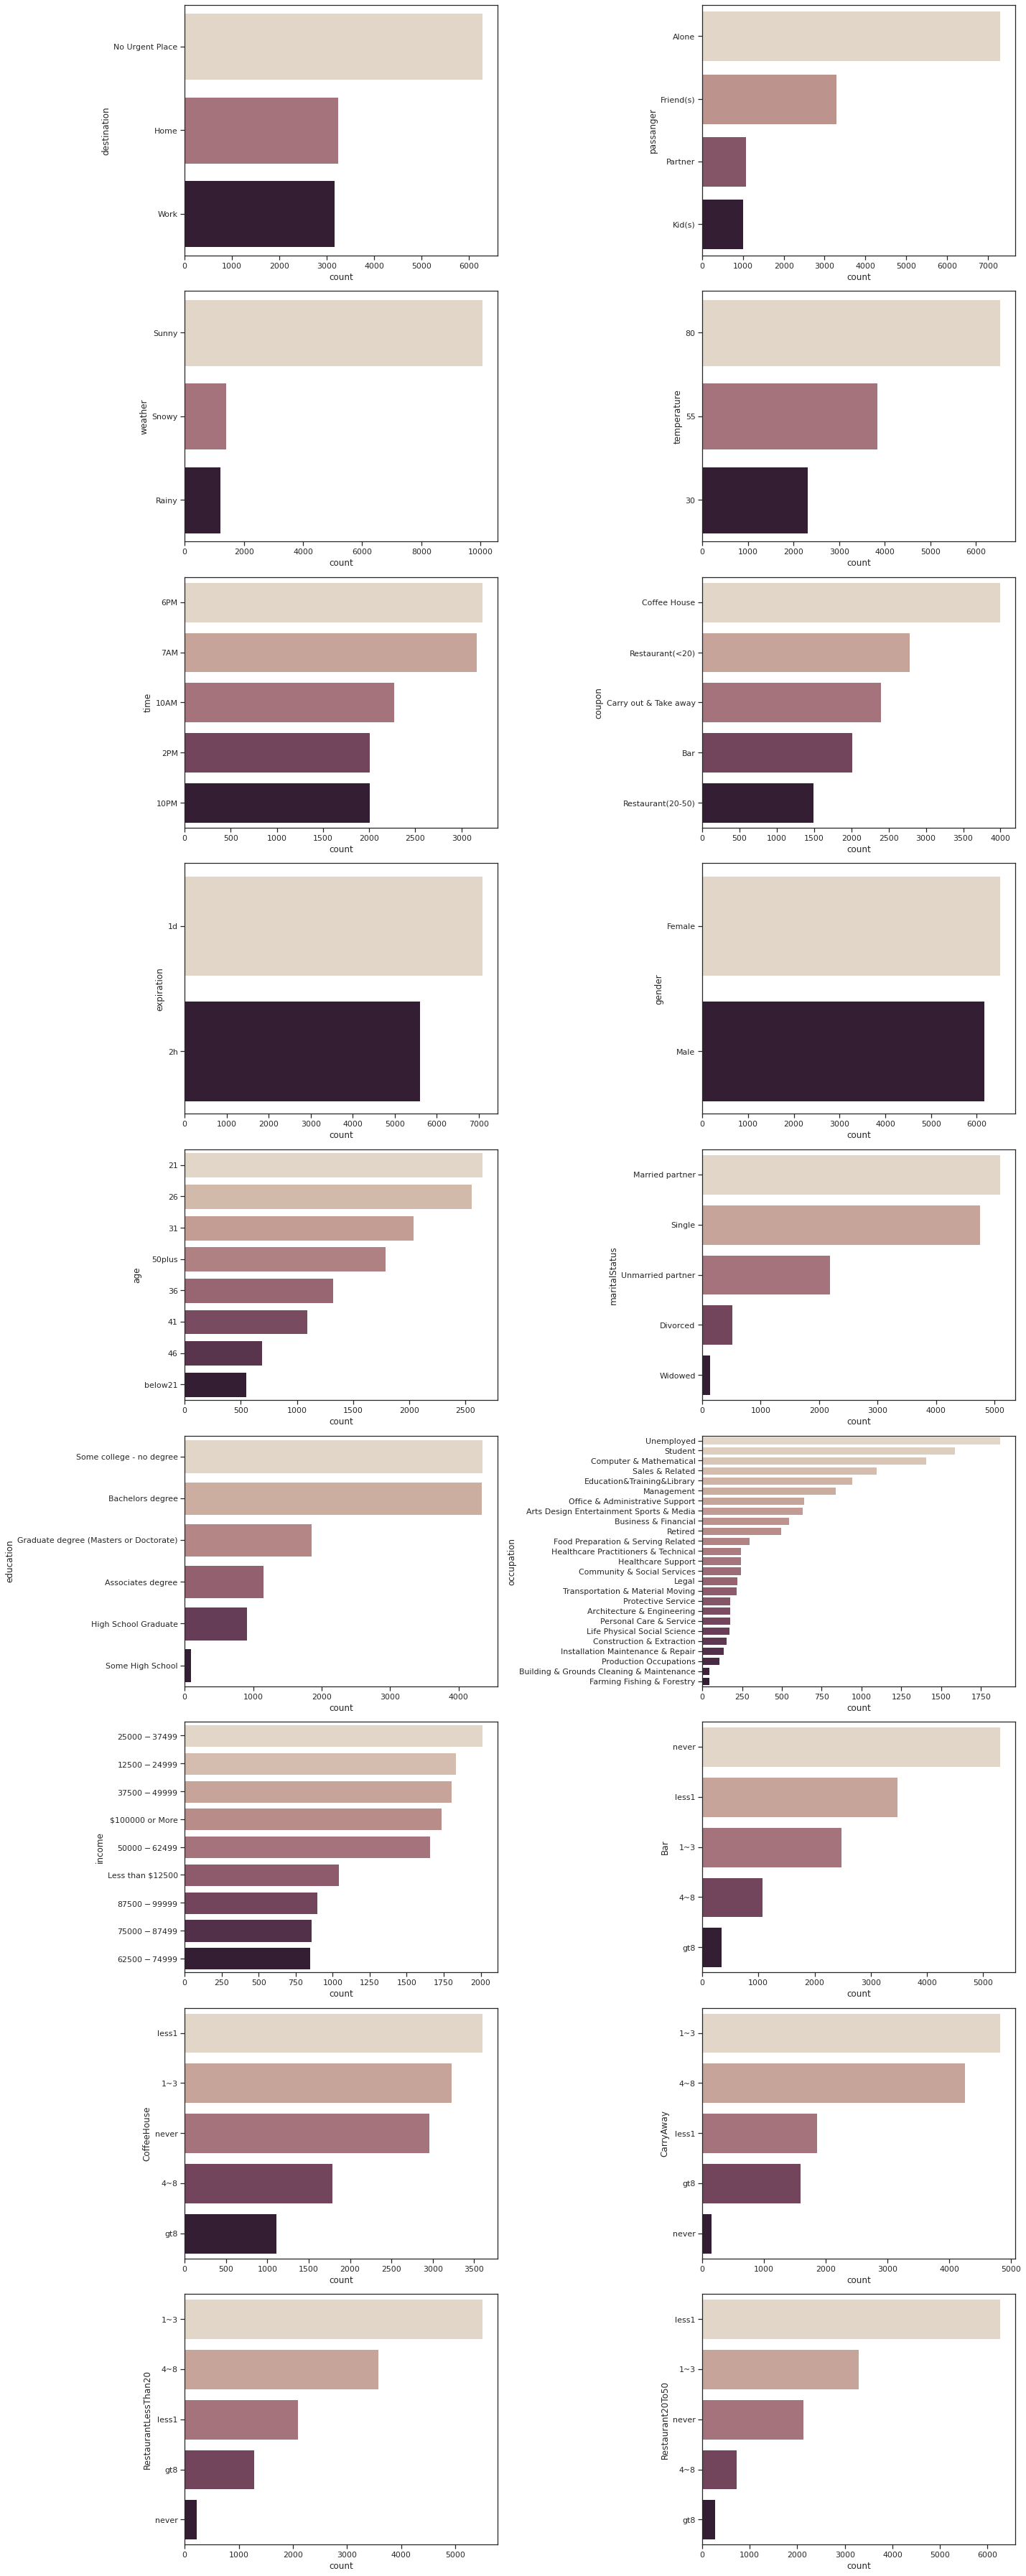

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

We are going to create feature vectors for our modeling by using the LabelEnconder and OneHotEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# enc = OneHotEncoder(dtype='int64')

# df_cat = df.select_dtypes(include=['category']).copy()
# df_int = df.select_dtypes(include=['int64']).copy()

# df_enc = pd.DataFrame()
# for col in df_cat.columns:
#     enc_results = enc.fit_transform(df_cat[[col]])
#     df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
#     df_enc = pd.concat([df_enc,df0], axis=1)
    
# df_final = pd.concat([df_enc, df_int], axis=1)


In [ ]:
number = LabelEncoder()
df['destination'] = number.fit_transform(df['destination'])
df['passanger'] = number.fit_transform(df['passanger'])
df['weather'] = number.fit_transform(df['weather'])
df['time'] = number.fit_transform(df['time'])
df['coupon'] = number.fit_transform(df['coupon'])
df['expiration'] = number.fit_transform(df['expiration'])
df['gender'] = number.fit_transform(df['gender'])
df['maritalStatus'] = number.fit_transform(df['maritalStatus'])
df['education'] = number.fit_transform(df['education'])
df['occupation'] = number.fit_transform(df['occupation'])
df['Bar'] = number.fit_transform(df['Bar'])
df['CoffeeHouse'] = number.fit_transform(df['CoffeeHouse'])
df['CarryAway'] = number.fit_transform(df['CarryAway'])
df['income'] = number.fit_transform(df['income'])
df['Restaurant20To50'] = number.fit_transform(df['Restaurant20To50'])
df['RestaurantLessThan20'] = number.fit_transform(df['RestaurantLessThan20'])

In [ ]:
df_final = df.copy()
print(df_final.age.unique())
df_final["age"].replace({"50plus":51, 'below21':20}, inplace=True)
df_final["age"]=df_final["age"].astype("int")
print(df_final.age.unique())

['21', '46', '26', '31', '41', '50plus', '36', 'below21']
Categories (8, object): ['21', '26', '31', '36', '41', '46', '50plus', 'below21']
[21 46 26 31 41 51 36 20]


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  int64   
 1   passanger             12684 non-null  int64   
 2   weather               12684 non-null  int64   
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  int64   
 5   coupon                12684 non-null  int64   
 6   expiration            12684 non-null  int64   
 7   gender                12684 non-null  int64   
 8   age                   12684 non-null  int64   
 9   maritalStatus         12684 non-null  int64   
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  int64   
 12  occupation            12684 non-null  int64   
 13  income                12684 non-null  int64   
 14  Bar                   12684 non-null  int64   
 15  Co

## Data Modeling

In [ ]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
x = df_final.drop("Y", axis=1)
y = df_final["Y"]

In [ ]:
#split data into training and test set
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

## Logistic Regression

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
model = LR.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_LR = model.predict(x_test)
y_pred_train_LR = model.predict(x_train)


print(classification_report(y_test, y_pred_LR))
print("Testing Score:- ",accuracy_score(y_test, y_pred_LR))
print("Training Score:- ",accuracy_score(y_train, y_pred_train_LR))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49      1643
           1       0.64      0.76      0.69      2163

    accuracy                           0.62      3806
   macro avg       0.61      0.60      0.59      3806
weighted avg       0.61      0.62      0.61      3806

Testing Score:-  0.6174461376773516
Training Score:-  0.634489749943681


## Decision Tree

In [ ]:
DTC = DecisionTreeClassifier()

param = {"criterion":["gini", "entropy"],
         "max_depth": np.arange(1,20),
         "min_samples_split": np.arange(1,20),
         "min_samples_leaf" : np.arange(1,20)}

rscv = RandomizedSearchCV(DTC, param_distributions=param, cv=10)
rscv.fit(x_train, y_train)
rscv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_depth': 7,
 'criterion': 'entropy'}

In [ ]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=3, min_samples_leaf=10)
DT_model = DTC.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(x_test)

y_pred_train_DTC = DT_model.predict(x_train)


print(classification_report(y_test, y_pred_DTC))
print("Testing Score:- ",accuracy_score(y_test, y_pred_DTC))
print("Training Score:- ",accuracy_score(y_train, y_pred_train_DTC))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62      1643
           1       0.71      0.82      0.76      2163

    accuracy                           0.71      3806
   macro avg       0.71      0.69      0.69      3806
weighted avg       0.71      0.71      0.70      3806

Testing Score:-  0.7078297425118234
Training Score:-  0.7322595179094391


In [ ]:
DTC = DecisionTreeClassifier(ccp_alpha=0.0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
pruning = DTC.cost_complexity_pruning_path(x_train, y_train)

In [ ]:
ccp_alpha_values = pruning["ccp_alphas"]

In [ ]:
testing_accuracy  = []
training_accuracy = []

for ccp in ccp_alpha_values:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp, random_state=2)
    dt_model.fit(x_train, y_train)
    training_accuracy.append(dt_model.score(x_train, y_train))
    testing_accuracy.append(dt_model.score(x_test, y_test))


In [ ]:
Max_accuracy = max(testing_accuracy)
index = testing_accuracy.index(max(testing_accuracy))

In [ ]:
## Testing Accuracy
print(f"Maximum accuracy of testing {Max_accuracy} at index:- {index}")
print(f"Maximum accuracy of testing at alpha :- {ccp_alpha_values[846]}")

## Training Accuracy
taininig_score = training_accuracy[846]
taininig_score

Maximum accuracy of testing 0.7002101944298476 at index:- 912
Maximum accuracy of testing at alpha :- 0.0002389244078170156


0.8312683036719982

## K-Nearest Neighbors

In [ ]:
KNN = KNeighborsClassifier()

param = {"n_neighbors":np.arange(1,20), "p":[1,2]}

rscv = RandomizedSearchCV(KNN, param_distributions=param, cv=10)
rscv.fit(x_train, y_train)
rscv.best_params_

{'p': 1, 'n_neighbors': 18}

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=18,p=1)
knn_model = KNN.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_KNN = knn_model.predict(x_test)
y_pred_train_KNN = knn_model.predict(x_train)

print(classification_report(y_test, y_pred_KNN))

print("Testing Score:- ",accuracy_score(y_test, y_pred_KNN))
print("Training Score:- ",accuracy_score(y_train, y_pred_train_KNN))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1643
           1       0.67      0.68      0.67      2163

    accuracy                           0.63      3806
   macro avg       0.62      0.62      0.62      3806
weighted avg       0.63      0.63      0.63      3806

Testing Score:-  0.6261166579085654
Training Score:-  0.7056769542689795


## Naive Bayes GaussianNB

In [ ]:
GNB = GaussianNB()
GNB_model = GNB.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_GNB = GNB_model.predict(x_test)
y_pred_train_GNB = GNB_model.predict(x_train)


print(classification_report(y_test, y_pred_GNB))

print("Testing Score:- ",accuracy_score(y_test, y_pred_GNB))
print("Training Score:- ",accuracy_score(y_train, y_pred_train_GNB))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1643
           1       0.63      0.77      0.69      2163

    accuracy                           0.61      3806
   macro avg       0.60      0.59      0.58      3806
weighted avg       0.60      0.61      0.60      3806

Testing Score:-  0.6100893326326853
Training Score:-  0.6097093940076593


## Support Vector Machine

In [ ]:
SVM = SVC()

hype = {"C":np.arange(1,10),
       "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}

rscv = RandomizedSearchCV(SVM, hype, cv=10)
rscv.fit(x_train, y_train)
rscv.best_params_

{'kernel': 'linear', 'C': 3}

In [ ]:
SVM = SVC(C=3, kernel="linear",probability=True)
SVM_model = SVM.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_SVM       = SVM_model.predict(x_test)
y_pred_train_SVM = SVM_model.predict(x_train)

print(classification_report(y_test, y_pred_SVM))

print("Testing Score:- ",accuracy_score(y_test, y_pred_SVM))
print("Training Score:- ",accuracy_score(y_train, y_pred_train_SVM))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49      1643
           1       0.64      0.76      0.69      2163

    accuracy                           0.62      3806
   macro avg       0.61      0.60      0.59      3806
weighted avg       0.61      0.62      0.61      3806

Testing Score:-  0.6182343667892801
Training Score:-  0.6364045956296464


In [ ]:
cm_DTC = confusion_matrix(y_test,y_pred_SVM)
pd.crosstab(y_test, y_pred_DTC, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,920,723,1643
1,389,1774,2163
All,1309,2497,3806


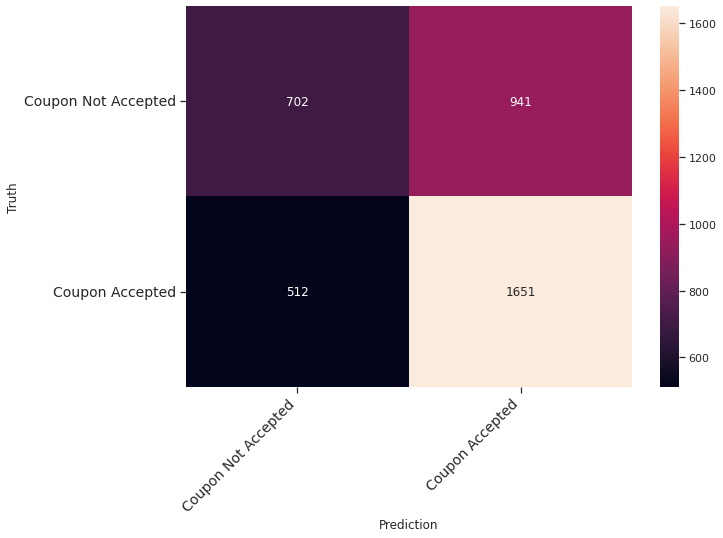

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_DTC,["Coupon Not Accepted", "Coupon Accepted"])

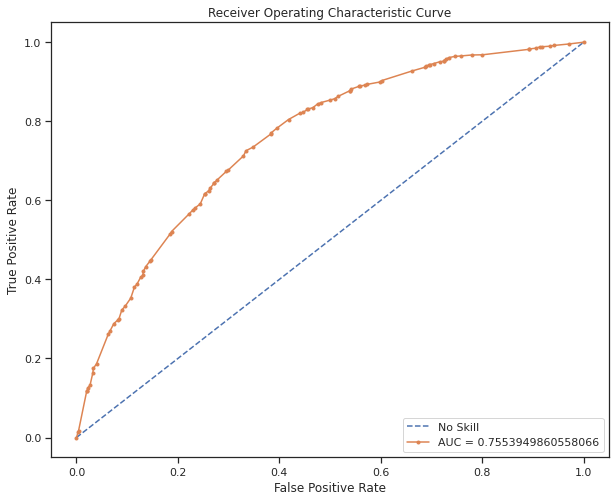

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = DT_model.predict_proba(x_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

## Precision And Recall Curve

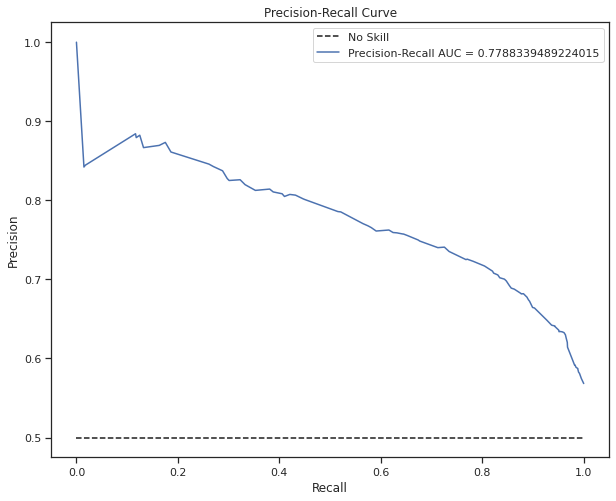

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()